接下来介绍图像变换的相关知识:

In [44]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


图像仿射变换：<span style="color:red;">warpAffine(img,M,dsize)</span>函数

解释下上面函数的参数：第一个img就是处理的图像的对象，第二个参数就是一个2*3的矩阵，dsize就是转换图像后的绝对尺寸

重点解释下第二个参数M矩阵：[[a,b,tx],[c,d,ty]]，下面我结合操作来说明矩阵元素的作用：

图像的平移：只取决于tx和ty的大小

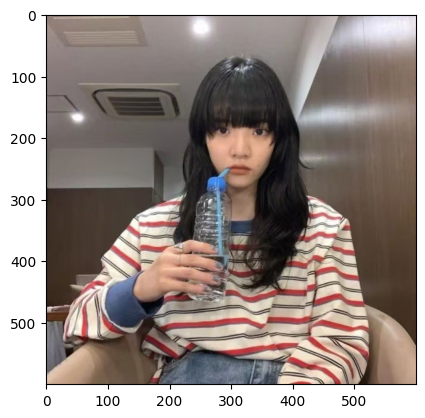

In [45]:
img=cv.imread('D:\image\\aimyon.jpg')
plt.imshow(img[:,:,::-1])

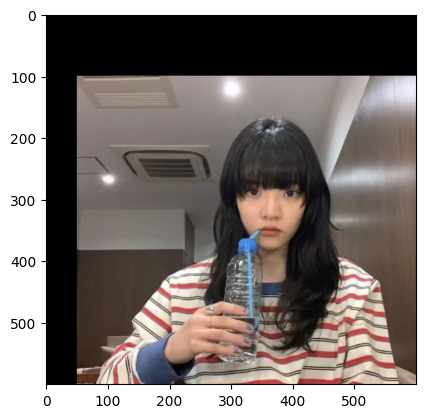

In [46]:
h,w=img.shape[:2]
M=np.float32([[1,0,50],[0,1,100]])
plt.imshow(cv.warpAffine(img,M,(w,h))[:,:,::-1])


上面的tx和ty分别为50，100。相当于图像在x轴和y轴分别移动50，100个像素

图像的旋转：

旋转过程设计三个主要过程：<span style="color:red;">1.</span>由于opencv旋转的操作是基于原点进行的，所以先要将图像中的所有的像素点转换到实际设定的旋转中心为原点的坐标系中。<span style="color:red;">2.</span>在新的图像坐标系中进行旋转操作。<span style="color:red;">3.</span>将旋转好的图像，转换回坐标原点在左上角的标准坐标系。

以上的计算的操作可以通过cv2的函数<span style="color:red;">getRotationMatrix2D(center,angle,scale)</span>实现,
OpenCV 中用于生成旋转 + 缩放仿射变换矩阵的函数，其核心原理是基于平面几何变换的数学推导，结合旋转中心、角度和缩放因子计算出 2x3 的仿射矩阵 M，供 warpAffine 函数使用

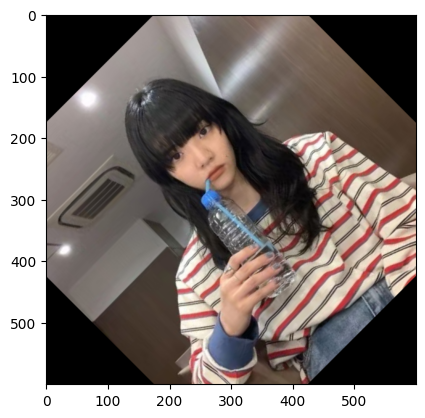

In [47]:
Ro_M=cv.getRotationMatrix2D((300,300),45,1)#scale=1,维持原图像大小比例
img_R=cv.warpAffine(img,Ro_M,(0,0))#这里没指定显示图像的绝对尺寸，让系统自动决定
plt.imshow(img_R[:,:,::-1])

对于超出dsize的部分，就会丢失图像像素

图像的仿射变换：图像的缩放，旋转，翻转和平移的操作组合

opencv解决这个操作的基本原理是：因为上述的图像操作的作用域都是全体像素，且旧像素和新像素的的映射关系对于所有像素点都是相同的。故opencv提供了<span style="color:red;">getAffineTransform</span>函数来计算映射关系。

他需要两个3*2的矩阵，一个矩阵是原图像的三个点坐标，一个矩阵是变换图像后的三个点对应的新坐标。通过这三对变换点，opencv会创建6个方程分别求解,a,b,c,d,tx,ty这6个参数，从而确定仿射矩阵 M。当然这三个点不应该共线(保证线性不相关性才可以求解方程组)

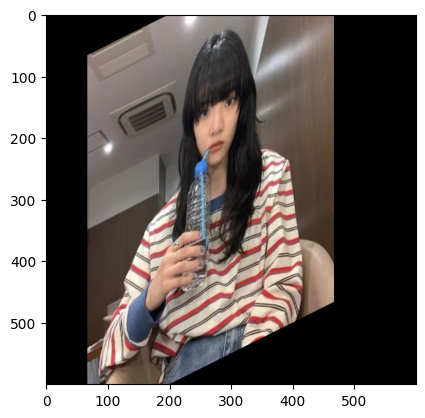

In [48]:
old_xy=np.float32([[50,50],[200,50],[50,200]])
new_xy=np.float32([[100,100],[200,50],[100,250]])
M_T=cv.getAffineTransform(old_xy,new_xy)
img_T=cv.warpAffine(img,M_T,(0,0))
plt.imshow(img_T[:,:,::-1])

显然图像的缩放，旋转，翻转和平移都可以用这一个函数算出M矩阵，但是可能不如某些操作的专有函数简单，例如旋转操作的getRotationMatrix2D函数

接下来介绍图像的透射变换：具体操作和原理图见下图，这里不详细介绍具体的原理

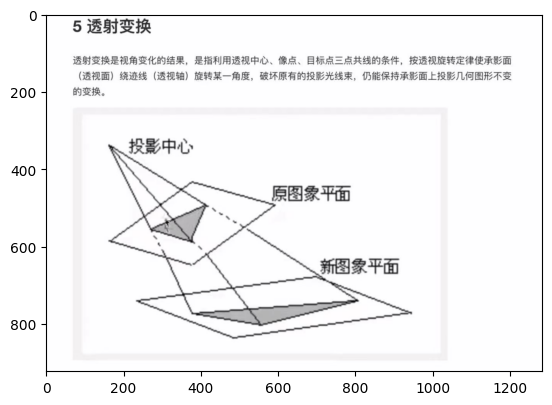

In [49]:
theory_1=cv.imread('D:\Code\Opencv\image_transform\\theory_1.jpg')
plt.imshow(theory_1[:,:,::-1])

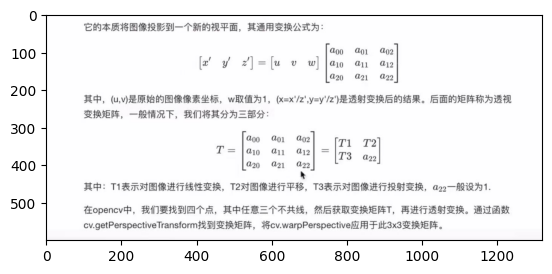

In [50]:
theory_2=cv.imread('D:\Code\Opencv\image_transform\\theory_2.jpg')
plt.imshow(theory_2[:,:,::-1])

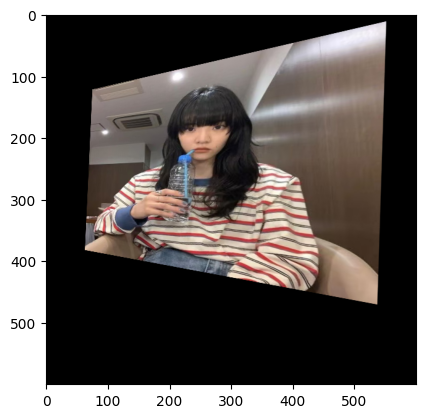

In [51]:
dst1=np.float32([[56,65],[368,52],[28,387],[389,390]])
dst2=np.float32([[100,145],[300,100],[80,290],[310,300]])
T=cv.getPerspectiveTransform(dst1,dst2)
img_P=cv.warpPerspective(img,T,(0,0))
plt.imshow(img_P[:,:,::-1])